In [1]:
import gymnasium as gym
import numpy as np
from gymnasium import spaces
import matplotlib.pyplot as plt
import random
np.random.seed(21)

In [2]:
def list_to_tuple(list_l):
    tuple_1 = [tuple(row) for row in list_l]
    return tuple_1

In [3]:
class TicTacToe:
    def __init__(self):
        self.board=[[' ',' ',' '],[' ',' ',' '],[' ',' ',' ']]

        self.opponent='O'

        self.agent='X'
        
        self.count=0

        self.opponent_starts=True

    def reward(self,n):
        if n=='X':
            return 1
        else:
            return -1
        
    def print_board(self):
        for row in self.board:
            print("|".join(row))
            print("-" * 5)

    def index_box(self,box):
        row=box//3
        column=box-row*3
        return [row,column]

    def act(self,box):
        idx=self.index_box(box)
        if box not in range(0,9):
            return 0
        if self.board[idx[0]][idx[1]]=='X' or self.board[idx[0]][idx[1]]=='O':
            return 0
        else:
            if self.opponent_starts==True:
                if self.count%2==0:
                    self.board[idx[0]][idx[1]]='O'
                else:
                    self.board[idx[0]][idx[1]]='X'

            else:
                if self.count%2==0:
                    self.board[idx[0]][idx[1]]='X'
                else:
                    self.board[idx[0]][idx[1]]='O'
            self.count+=1

        return 1
    
    def check_winner(self):
        for i in range(3):
            if self.board[i][0] == self.board[i][1] == self.board[i][2] != ' ':
                return self.reward(self.board[i][0])
            if self.board[0][i] == self.board[1][i] == self.board[2][i] != ' ':
                return self.reward(self.board[0][i])  
        
        if self.board[0][0] == self.board[1][1] == self.board[2][2] != ' ':
            return self.reward(self.board[0][0]) 
        if self.board[0][2] == self.board[1][1] == self.board[2][0] != ' ':
            return self.reward(self.board[0][2])  

        for row in self.board:
            for cell in row:
                if cell == ' ':
                    return 0
        return -0.05

    def reset(self):
        self.board=[[' ',' ',' '],[' ',' ',' '],[' ',' ',' ']] 

In [4]:
def reward(n):
        if n=='X':
            return 1
        else:
            return -1

def check_winner(board):
    for i in range(3):
        if board[i][0] == board[i][1] == board[i][2] != ' ':
            return reward(board[i][0])
        if board[0][i] ==board[1][i] == board[2][i] != ' ':
            return reward(board[0][i])  
    
    if board[0][0] == board[1][1] == board[2][2] != ' ':
        return reward(board[0][0]) 
    if board[0][2] == board[1][1] == board[2][0] != ' ':
        return reward(board[0][2])  

    for row in board:
        for cell in row:
            if cell == ' ':
                return 0
    return -0.05

In [5]:
""" 

Agent who plays random moves

"""
class random_agent:
    
    def __init__(self) -> None:
        pass

    #takes an action on the board randomly
    def act(self,board):
        move=np.random.randint(0,9)

        while board.act(move)==0:
            move=np.random.randint(0,9)
        board.act(move)
        return move

""" 
Safe agent - If there is a winning move
for the safe agent, then the corresponding square is picked. Else, if there is a blocking
move, the corresponding square is chosen

"""


class safe_agent:
     
     def __init__(self) -> None:
          pass
     
     def act(self, board):
        for i in range(3):
            # Check for winning moves
            if board.board[i][0] == board.board[i][1] == 'O' and board.board[i][2] == ' ':
                move = i * 3 + 2
                board.act(move)
                return move
            if board.board[i][1] == board.board[i][2] == 'O' and board.board[i][0] == ' ':
                move = i * 3
                board.act(move)
                return move
            if board.board[i][0] == board.board[i][2] == 'O' and board.board[i][1] == ' ':
                move = i * 3 + 1
                board.act(move)
                return move
            if board.board[0][i] == board.board[1][i] == 'O' and board.board[2][i] == ' ':
                move = 6 + i
                board.act(move)
                return move
            if board.board[0][i] == board.board[2][i] == 'O' and board.board[1][i] == ' ':
                move = 3 + i
                board.act(move)
                return move
            if board.board[2][i] == board.board[1][i] == 'O' and board.board[0][i] == ' ':
                move = i
                board.act(move)
                return move
        
        # If no winning moves, then check for blocking moves
        for i in range(3):
            if board.board[i][0] == board.board[i][1]=='X' and board.board[i][2] == ' ':
                move = i * 3 + 2
                board.act(move)
                return move
            if board.board[i][1] == board.board[i][2]=='X' and board.board[i][0] == ' ':
                move = i * 3
                board.act(move)
                return move
            if board.board[i][0] == board.board[i][2]=='X' and board.board[i][1] == ' ':
                move = i * 3 + 1
                board.act(move)
                return move
            if board.board[0][i] == board.board[1][i]=='X' and board.board[2][i] == ' ':
                move = 6 + i
                board.act(move)
                return move
            if board.board[0][i] == board.board[2][i]=='X' and board.board[1][i] == ' ':
                move = 3 + i
                board.act(move)
                return move
            if board.board[2][i] == board.board[1][i]=='X' and board.board[0][i] == ' ':
                move = i
                board.act(move)
                return move

        # If no winning or blocking moves, make a random move
        move = np.random.randint(0, 9)
        while board.act(move) == 0:
            move = np.random.randint(0, 9)
        
        return move

""" 

This agent refers to the Q-table and chooses 
the action to be made at a particular state greedily

if q(s,a) has not yet been appended in Q-table then makes a random choice

"""                
class trained_agent:
     def __init__(self) -> None:
          pass

     def act(self,q_values,board):
          max_action=None

          for action in range(0,9):
               if (tuple(list_to_tuple(board.board)),action) in q_values.keys():
                    if max_action==None:
                         max_action=action
                    if q_values[(tuple(list_to_tuple(board.board)),action)]>q_values[(tuple(list_to_tuple(board.board)),max_action)]:
                         max_action=action
         
          if max_action==None:
               max_action=np.random.randint(0,9)
               while board.act(max_action)==0:
                    max_action=np.random.randint(0,9)
          board.act(max_action)
          
          return max_action
               


                
          
     




In [6]:
q_values={}

In [7]:
class Train_agent:
    def __init__(self,board,agent,alpha,gamma,epsilon):
        """ 
        args:
            agent- Agent to train

            opponent- Safe or random opponent

            board- The TicTacToe board

            gamma- gamma

            alpha- alpha
            
            epsilon- epsilon
        
        """
        self.agent=agent

        self.opponent1=random_agent()

        self.opponent2=safe_agent()

        self.board=board
        self.gamma=gamma
        self.alpha=alpha
        self.epsilon=epsilon

        """ 
        Assuming 
        
        Agent is 'X'
        Opponent is 'O'
        """

    def train_against(self,num_games,op):
        # number of losses ,draws ,wins respectively
        out_come=[0,0,0]
        for i in range(num_games):

            # coin toss to decide who starts
            who_starts=np.random.randint(0,2)
            if who_starts==0:
                self.board.opponent_starts=True
            else:
                self.board.opponent_starts=False
                
            while self.board.check_winner()==0:
                
                # Opponent starts if who_starts is 0 else agent
                if who_starts==0:
                    if op==1:
                        self.opponent1.act(self.board)
                    else:
                        self.opponent2.act(self.board)

                if self.board.check_winner()!=0:
                    break

                q_s_a=[tuple(list_to_tuple(self.board.board))]

                move=self.agent.act(q_values=q_values,board=self.board)

                q_s_a.append(move)

                # Dictionary keys can be tuples but not lists

                q_s_a=tuple(q_s_a)


                # If q(s,a) does not exist append in dictionary

                if q_s_a not in q_values.keys():
                    q_values[q_s_a]=0

                if self.board.check_winner()!=0:
                    break

                max_action=None

                """
                s' --> state after agent plays a move

                Find max action a' such that q(s',a') is maximixed 
                then use a epsilon-greedy policy
                
                """
                qs=[]
                actions=[]
                for action in range(0,9):
                    if (tuple(list_to_tuple(self.board.board)),action) in q_values.keys():
                        qs.append(q_values[(tuple(list_to_tuple(self.board.board)),action)])
                        actions.append(action)
                m=len(actions)
                if m!=0:
                    weights=[self.epsilon/m for _ in range(m)]
                    indx=qs.index(max(qs))
                    weights[indx]=1-self.epsilon

                    max_action=random.choices(actions,weights)[0]

                """ 
                if no q(s',a) pair exists in dictionary for all actions just continue
                """
                if max_action==None:
                    continue
                """ 
                Else update the q(s,a) using Q-learning
                """
                q_hat=(tuple(list_to_tuple(self.board.board)), max_action)


                q_values[q_s_a]=q_values[q_s_a]+(self.alpha/(i+1))*(check_winner(q_s_a[0])+(self.gamma*q_values[q_hat])-q_values[q_s_a])
           
                if who_starts==1:
                    if op==1:
                        self.opponent1.act(self.board)
                    else:
                        self.opponent2.act(self.board)
                if self.board.check_winner()!=0:
                        break
            temp=self.board.check_winner()
            if temp==-1:
                out_come[0]+=1
            elif temp==-0.05:
                out_come[1]+=1
            else:
                out_come[2]+=1
            # Resets the board for the next game

            self.board.reset()
        return out_come

    def play_against(self,num_games,op):
        # number of losses ,draws ,wins respectively
        out_come=[0,0,0]
        for _ in range(num_games):

            # coin toss to decide who starts
            who_starts=np.random.randint(0,2)
            if who_starts==0:
                self.board.opponent_starts=True
            else:
                self.board.opponent_starts=False
                
            while self.board.check_winner()==0:
                
                # Opponent starts if who_starts is 0 else agent
                if who_starts==0:
                    if op==1:
                        self.opponent1.act(self.board)
                    else:
                        self.opponent2.act(self.board)

                if self.board.check_winner()!=0:
                    break

                q_s_a=[tuple(list_to_tuple(self.board.board))]

                move=self.agent.act(q_values=q_values,board=self.board)

                q_s_a.append(move)

                # Dictionary keys can be tuples but not lists

                q_s_a=tuple(q_s_a)



                # If q(s,a) does not exist append in dictionary

                if q_s_a not in q_values.keys():
                    q_values[q_s_a]=-10

                if self.board.check_winner()!=0:
                    break

                max_action=None

                """
                s' --> state after agent plays a move

                Find max action a' such that q(s',a') is maximixed 
                
                """
                for action in range(0,9):
                    if (tuple(list_to_tuple(self.board.board)),action) in q_values.keys():
                        if max_action==None:
                            max_action=action
                        if q_values[(tuple(list_to_tuple(self.board.board)),action)]>q_values[(tuple(list_to_tuple(self.board.board)),max_action)]:
                            max_action=action
                """ 
                if no q(s',a) pair exists in dictionary for all actions just continue
                """
                if max_action==None:
                    continue

                if who_starts==1:
                    if op==1:   
                        self.opponent1.act(self.board)

                    else:
                        self.opponent2.act(self.board)
                if self.board.check_winner()!=0:
                        break
            temp=self.board.check_winner()
            if temp==-1:
                out_come[0]+=1
            elif temp==-0.05:
                out_come[1]+=1
            else:
                out_come[2]+=1
            # Resets the board for the next game

            self.board.reset()
        return out_come



In [8]:
board=TicTacToe()

agent1=trained_agent()

trainer=Train_agent(board=board,agent=agent1,alpha=1,gamma=1,epsilon=0.1)

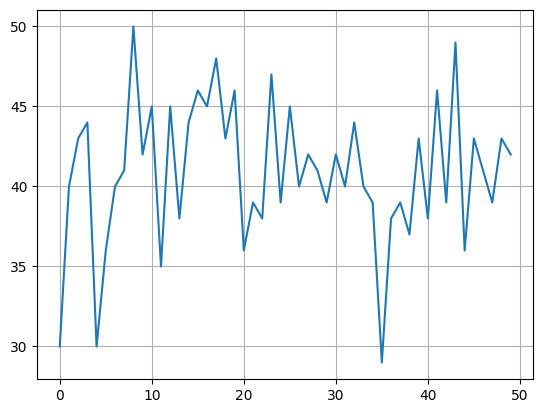

In [9]:
""" 
a) Train against random agent

"""

wins=[]

for i in range(50):
    trainer.train_against(1000,op=1)

    wins.append(trainer.play_against(100,op=1)[2])

plt.plot(wins)
plt.grid()
plt.show()

In [10]:
# losses , draws and wins in trained agent trained against random agent vs random agent 
trainer.play_against(1000,op=1)

[459, 126, 415]

In [11]:
# losses , draws and wins in trained agent trained against random agent vs safe agent 
trainer.play_against(1000,op=2)

[506, 140, 354]

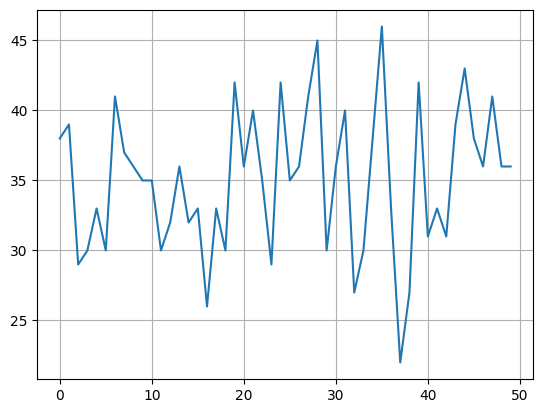

In [12]:
""" 
b) Train against safe agent

"""
q_values={}
wins=[]

for i in range(50):
    trainer.train_against(1000,op=2)

    wins.append(trainer.play_against(100,op=2)[2])

plt.plot(wins)
plt.grid()
plt.show()

In [13]:
# losses , draws and wins in trained agent trained against safe agent vs random agent 
trainer.play_against(1000,op=1)

[418, 139, 443]

In [14]:
# losses , draws and wins in trained agent trained against safe agent vs safe agent 
trainer.play_against(1000,op=2)

[394, 217, 389]

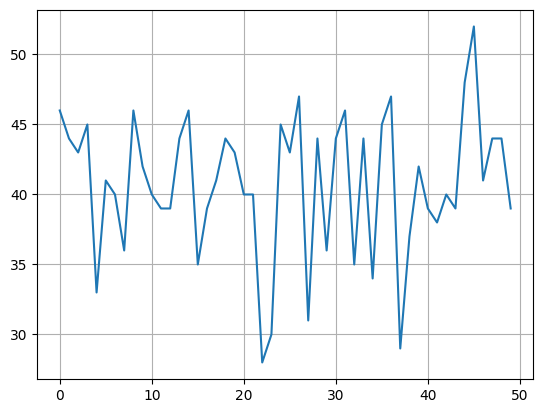

In [15]:
""" 
c) Train against safe agent or random agent randomly

"""
q_values={}
wins=[]

for i in range(50):
    temp=np.random.randint(1,3)
    trainer.train_against(1000,op=temp)
    wins.append(trainer.play_against(100,op=1)[2])

plt.plot(wins)
plt.grid()
plt.show()

In [16]:
# losses , draws and wins in trained agent trained against safe agent vs random agent 
trainer.play_against(1000,op=1)

[447, 133, 420]

In [17]:
# losses , draws and wins in trained agent trained against safe agent vs safe agent 
trainer.play_against(1000,op=2)

[442, 233, 325]